# Titanic project: survival prediction 
This is a Kaggle competition linked: https://www.kaggle.com/competitions/titanic. 
The task is to predict the survival of the passenger on board on the Titanic through the study and analysis of the features available on this dataset. The task is a binary classification task where the label 1 refers to those who will survive, and 0 refers to those who won't survive in the Titanic Disaster.

Enjoy seeing my analysis!

# First step: Data preparation & Feature Extraction 

In [1]:
#1 survived , 0 non survived 
%pylab inline
import pandas as pd
train_dataset=pd.read_csv('titanic/train.csv', encoding='utf8')
train_dataset.head()

Populating the interactive namespace from numpy and matplotlib


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


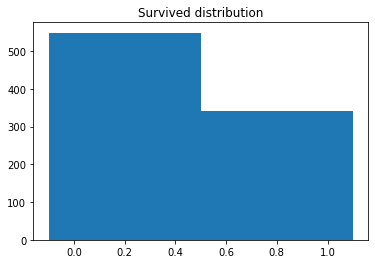

In [2]:
y= train_dataset.Survived
y.shape
plt.title("Survived distribution")
plt.hist(y,bins=2, range=[-0.1,1.1])
plt.hist?

|  | **Variable	Definition	Key** | |
| --- | --- | --- |
| survival: |	**Survival** |	0 = **No**, 1 = **Yes**   |
| pclass:| Ticket class  |1 = **first**, 2 = **second**, 3 = **third class** |
| sex: |  Sex|(**M/F**) |
| Age: |  **Age** | years |
|sibsp:   |  | $$Sibsp= \frac{ \# \ of \ siblings}{ \# \ spouses \ aboard \ the \ Titanic}$$ |
| parch: |  |$$Parch=\frac{\# \ of \ parents}{ \# \ children \ aboard \ the \ Titanic} $$ 	 |
|ticket: |	|**Ticket number**| 	
|Passenger fare:| 	|**cost** of the ticket|
|cabin:| 	|**Cabin number** |
|embarked:| 	Port of Embarkation |	**C = Cherbourg, Q = Queenstown, S = Southampton**|

Now It's time to convert some features in number e.g. the Sex and the Port. The former will be assigned according to a binary classification: 0 for female sex, 1 for male. For the embark as a feature, I will show the distribution of the population of the three ports used. 

Number of C:  168
Number of Q:  77
Number of S:  644


Text(0, 0.5, 'entries')

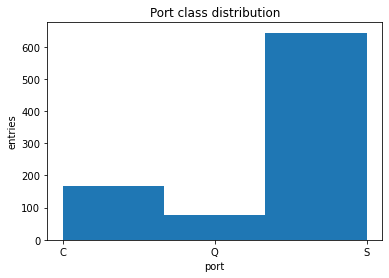

In [3]:
train_sex=[]
for ii in train_dataset.Sex:
    if(ii=='female'):
        train_sex.append(0)#0 if FEMALE
    else:
        train_sex.append(1)# 1 if MALE
train_embark=[]
countC=0
countQ=0
countS=0
for ii in train_dataset.Embarked:
    if(ii =='C'):
        train_embark.append(0) #0  if Cherbourg
        countC=countC+1
    elif(ii =='Q'):
        train_embark.append(1) # 1 if Queenstown
        countQ=countQ+1
    elif(ii =='S'):
        train_embark.append(2) # 2 if Southampton
        countS=countS+1
    else:
        train_embark.append(np.nan)  
print("Number of C: ", countC)
print("Number of Q: ", countQ)
print("Number of S: ", countS)
embark_class=[countC,countQ,countS]
plt.hist(['C','Q','S'],bins=3,weights=[countC,countQ,countS])
plt.title("Port class distribution")
plt.xlabel("port")
plt.ylabel('entries')

The most popular port for the Titanic embark is the Southampton port.

In [4]:
train_embark=np.array(train_embark)
train_sex=np.array(train_sex)
train_Pclass=np.array(train_dataset.Pclass)
train_Age=np.array(train_dataset.Age)
train_SibSp=np.array(train_dataset.SibSp)
train_Parch=np.array(train_dataset.Parch)
train_Fare=np.array(train_dataset.Fare)

In [5]:
train_dataset.Ticket.unique();

# Trasforming 'nan' point into a new datapoint: 
We can notice in Cabin or in other features there are a lot of missing points denoted as **NaN**: this creates problems to the model and we have two possible ways to treat them: 

-  fix the datapoint with a "simulated" data
-  do not use the features with missing points

I am going to study how to simulate the missing datapoint.

In [6]:
train_dataset.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

Studying the Cabin as a feature, we discern a letter and a number. I can interpretate the letter as the floor of the boat, hence the vertical axes, and the number as the number of the room and, as a consequence, the position along the horizontal axes.
Here, there are other **NaN**, we must treat them!

In [99]:
cabin=train_dataset.Cabin
cabin;
nan_arr=[]
for i in range(cabin.shape[0]):
    word=str(cabin[i])
    if(word[0]=='A'):
        cabin[i]=1
    elif(word[0]=='B'):
        cabin[i]=2
    elif(word[0]=='C'):
        cabin[i]=3
    elif(word[0]=='D'):
        cabin[i]=4
    elif(word[0]=='E'):
        cabin[i]=5
    elif(word[0]=='F'):
        cabin[i]=6
    elif(word[0]=='G'):
        cabin[i]=7
    elif(word[0]=='T'):
        cabin[i]=8

In [8]:
array_random= []
for i in cabin:
    if not(isnan(i)):
        array_random.append(i)
max(array_random)

8

In [9]:
plt.hist;

array([15., 47., 59., 33., 32., 13.,  4.,  1.])

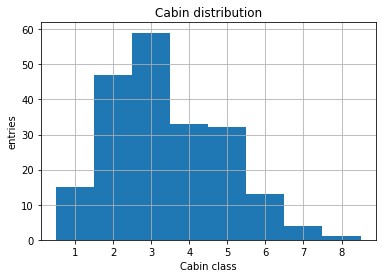

In [10]:
entries=[]
entries= plt.hist(array_random, bins=8, range=[0.5,8.5])
plt.title('Cabin distribution')
plt.grid()
plt.xlabel("Cabin class")
plt.ylabel("entries")
Nentries=entries[0]
Nentries

We discern that the C class is the most popular of the distribution.

Instead to evaluate the mean value of the distribution and fix the missing datapoints with it, I will use the class distribution as a **probability distribution** (normalized) and for each **Nan** point extract a random number that follows that probability distribution. In this way we avoid to popolize only one class ( i.e. using the mean value) and we popolize the entire class distribution with a simulated data that follow the same distribution.

In [11]:
bins=entries[1]
Nbins=bins[1:]

In [12]:
tot=sum(Nentries)
prob=[]
for i in Nentries:
    prob.append(i/tot)
prob;

In [13]:
np.random.choice;

Coming back on the nan data...

In [98]:
countNan=0
for i in range(cabin.shape[0]):
    if(isnan(cabin[i])):
        cabin[i]=np.random.choice(Nbins,p=prob)-0.5
cabin

0      5.0
1        3
2      5.0
3        3
4      6.0
      ... 
886    4.0
887      2
888    5.0
889      3
890    5.0
Name: Cabin, Length: 891, dtype: object

In [15]:
countNan=0
for i in cabin:
    if(isnan(i)):
        countNan+=1
countNan

0

for i in range(cabin.shape[0]):
        if (cabin[i]==1):
            cabin[i]='A'
        elif(cabin[i]==2):
            cabin[i]='B'
        elif(cabin[i]==3):
            cabin[i]='C'
        elif(cabin[i]==4):
            cabin[i]='D'
        elif(cabin[i]==5):
            cabin[i]='E'
        elif(cabin[i]==6):
            cabin[i]='F'
        elif(cabin[i]==7):
            cabin[i]='G'
        elif(cabin[i]==8):
            cabin[i]='T'

In [16]:
cabin

0      5.0
1        3
2      5.0
3        3
4      6.0
      ... 
886    4.0
887      2
888    5.0
889      3
890    5.0
Name: Cabin, Length: 891, dtype: object

In [17]:
#from pandas import get_dummies

In [18]:
#train_cabin=pd.get_dummies(cabin)

In [19]:
#shape(train_cabin)

In [20]:
#train_cabin=np.array(train_cabin)

In [21]:
#shape(train_cabin)

Using this strategy we avoid to have any missing points.

In [22]:
train_cabin=np.array(cabin)

Age,Embarked,Cabin has at least one NaN: we must study how to treat that datapoint, by now we can count how many nan we have.

In [23]:
lista=[train_embark,train_sex,train_cabin, train_Pclass, train_Age, train_SibSp, train_Parch, train_Fare]
count=0
for i in lista:
    for j in i:
        if( isnan(j)):
            count= count+1
    print( count)
    count=0

2
0
0
0
177
0
0
0


**Embark** has two Nan, we can replace those with the most popular port: Southampton.

In this way, I changed the nan with the most popular port used in the dataset

In [24]:
train_embark;
for i in range(train_embark.shape[0]):
    if (isnan(train_embark[i])):
        train_embark[i]=2
train_embark.shape

(891,)

In [25]:
countNan=0
for i in train_embark:
    if(isnan(i)):
        countNan+=1
countNan

0

Now we must treat the Age! Same strategy.

(array([30., 17., 15.,  9., 29., 64., 67., 70., 83., 62., 51., 40., 35.,
        27., 35., 23., 15.,  9., 11., 11.,  4.,  2.,  3.,  1.,  1.]),
 array([ 0.42  ,  3.6032,  6.7864,  9.9696, 13.1528, 16.336 , 19.5192,
        22.7024, 25.8856, 29.0688, 32.252 , 35.4352, 38.6184, 41.8016,
        44.9848, 48.168 , 51.3512, 54.5344, 57.7176, 60.9008, 64.084 ,
        67.2672, 70.4504, 73.6336, 76.8168, 80.    ]),
 <BarContainer object of 25 artists>)

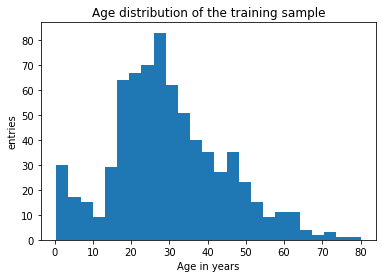

In [26]:
train_Age
train_Agesplit=[]
for i in train_Age:
    if(isfinite(i)):
        train_Agesplit.append(i)
train_Agesplit;
myhisto=plt.hist(train_Agesplit, bins=25)
plt.title("Age distribution of the training sample")
plt.xlabel("Age in years")
plt.ylabel("entries")

NentriesAge=myhisto[0]
binsAge=myhisto[1]
myhisto

In [27]:
probAge=[]
totAge=sum(NentriesAge)
for i in NentriesAge:
    probAge.append(i/totAge)
size(probAge);

In [28]:
binsAget=binsAge[1:]
binsAget

array([ 3.6032,  6.7864,  9.9696, 13.1528, 16.336 , 19.5192, 22.7024,
       25.8856, 29.0688, 32.252 , 35.4352, 38.6184, 41.8016, 44.9848,
       48.168 , 51.3512, 54.5344, 57.7176, 60.9008, 64.084 , 67.2672,
       70.4504, 73.6336, 76.8168, 80.    ])

In [29]:
np.random.choice(binsAget,p=probAge, size=15);

In [30]:
train_Age2=np.array(train_dataset.Age)
for i in range(train_Age2.shape[0]):
    if(isnan(train_Age2[i])):
        train_Age2[i]=np.random.choice(binsAget,p=probAge)
train_Age2;

In [31]:
lista=[train_Pclass,train_sex,train_Age2,train_SibSp,train_Parch,train_Fare,train_cabin,train_embark]
count=0
for i in lista:
    for j in i:
        if( isnan(j)):
            count= count+1
    print( count)
    count=0

0
0
0
0
0
0
0
0


I exchange nan in train_Age with the **mean** of the population

In [32]:
X_dataset=np.vstack((train_Pclass,train_sex,train_Age2,train_SibSp,train_Parch,train_Fare,train_cabin,train_embark))#,train_cabin,train_embark))
X_dataset=X_dataset.T;
#np.concatenate((X_dataset,train_cabin), axis=1)
#X_dataset=X_dataset.T;


In [33]:
#one_hot_encoded_data = pd.get_dummies(train_dataset, columns = ['Embarked','Cabin'])
#print(one_hot_encoded_data);

In [34]:
len(X_dataset[:,0])

891

Now the data preparation is finished as a process, the MVA analysis can start and we can use different models in order to see which one is the best.

In [35]:
from sklearn.model_selection import train_test_split,cross_val_score
X_train_dataset, X_test_dataset, y_train, y_test = train_test_split(X_dataset, y, train_size=2/3, test_size= 1/3, random_state=11)

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier

In [37]:
import seaborn as sns

In [38]:
train_dataset.dtypes;

# Logistic Regression

In [39]:
#LogisticRegression?

In [40]:
mode=LogisticRegression(penalty='l2',solver='lbfgs', class_weight='balanced', random_state=21, max_iter=1000)
mode.fit(X_train_dataset, y_train)
mode.score(X_train_dataset, y_train)
scoresLR=cross_val_score(mode, X_train_dataset, y_train, cv=5)
np.mean(scoresLR)

0.7675687224042158

# Random Forest Classifier

In [41]:
#RandomForestClassifier?

In [42]:
nr_trees= np.arange(25,400, 25)
nr_trees;

In [43]:
insampleE=[]
outofsampleE=[]
for tree in nr_trees:
    model=RandomForestClassifier(n_estimators=tree)
    model.fit(X_train_dataset, y_train)
    score=model.score(X_train_dataset, y_train) #in-sample-error
    insampleE.append(score)
    outscore=cross_val_score(model, X_train_dataset, y_train, cv=5)
    outofsampleE.append(np.mean(outscore))

highest score:  0.8096709870388834
nr of trees:  200


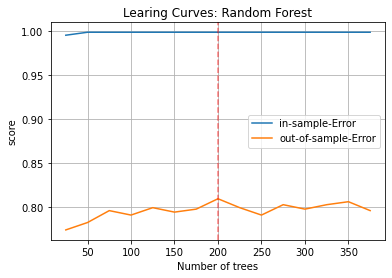

In [44]:
plt.plot(nr_trees,insampleE, label='in-sample-Error')
plt.plot(nr_trees, outofsampleE, label='out-of-sample-Error')
plt.title('Learing Curves: Random Forest')
plt.axvline(x = nr_trees[np.argmax(outofsampleE)],color = 'red', linestyle = '--', alpha = 0.5)
plt.grid()
plt.legend()
plt.xlabel("Number of trees")
plt.ylabel("score")
print('highest score: ', max(outofsampleE))
print('nr of trees: ',  nr_trees[np.argmax(outofsampleE)])
#old score 0.819

In [45]:
model2=RandomForestClassifier(n_estimators=nr_trees[argmax(outofsampleE)])
model2.fit(X_train_dataset,y_train)

RandomForestClassifier(n_estimators=200)

# KNN model

In [46]:
#KNeighborsClassifier?

In [47]:
nr_k=np.arange(3,25,1)
k_score=[]
k_validation=[]
for i in nr_k:
    model= KNeighborsClassifier(i)
    model.fit(X_train_dataset, y_train)
    score=model.score(X_train_dataset, y_train)
    k_score.append(score)
    scores=cross_val_score(model,X_train_dataset, y_train, cv=10)
    k_validation.append(np.mean(scores))

score:  0.691723163841808


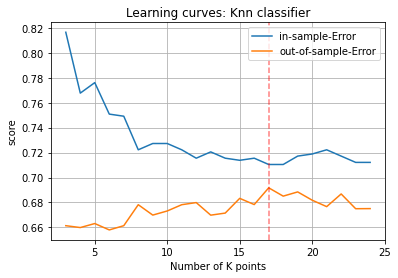

In [48]:
plt.plot(nr_k, k_score,label='in-sample-Error')
plt.plot(nr_k, k_validation, label='out-of-sample-Error')
plt.xlabel('Number of K points')
plt.ylabel('score')
plt.grid()
plt.legend()
plt.title("Learning curves: Knn classifier")
plt.axvline(x=nr_k[np.argmax(k_validation)], color='red',linestyle = '--', alpha = 0.5 )
print('score: ', max(k_validation))
#old score 0.703

In [49]:
model3=KNeighborsClassifier(nr_k[np.argmax(k_validation)])
model3.fit(X_train_dataset,y_train)

KNeighborsClassifier(n_neighbors=17)

# Naive Bayes models

In [50]:
#plt.legend?

Text(0.5, 1.0, 'survival class distribution')

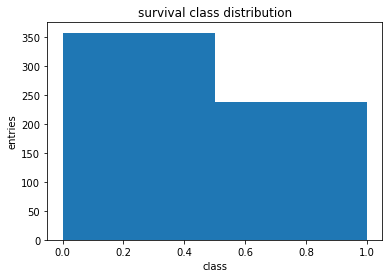

In [51]:
plt.hist(y_train,bins=2)
plt.xlabel("class")
plt.ylabel('entries')
plt.title("survival class distribution")

In [52]:
countS=0
countNS=0
for i in y_train:
    if i==1:
        countS+=1
    else:
        countNS+=1
S_prob=countS/(countS+countNS)
print(S_prob)

0.398989898989899


In [53]:
model4=GaussianNB()
model4.fit(X_train_dataset, y_train)
scoreIN=model4.score(X_train_dataset, y_train)
score=np.mean(cross_val_score(model4, X_train_dataset,y_train, cv=10))
print("in-sample: ", scoreIN)
print("out-sample: ", score)

in-sample:  0.7760942760942761
out-sample:  0.7727401129943503


In [54]:
model5=MultinomialNB()
model5.fit(X_train_dataset, y_train)
scoreIN=model5.score(X_train_dataset, y_train)
score=np.mean(cross_val_score(model5, X_train_dataset,y_train, cv=10))
print("in-sample: ", scoreIN)
print("out-sample: ", score)

in-sample:  0.6717171717171717
out-sample:  0.6734463276836158


# Multi-layer Perceptron Classifier

In [55]:
#MLPClassifier?

In [56]:
#plt.subplots?

In [57]:
activations=['identity','logistic','tanh','relu']
solvers=['lbfgs','sgd','adam']
alphas=np.arange(0.01,0.5,0.05)

In [58]:
#model=MLPClassifier((4,4,2), activation=, solver=, alpha=,learning_rate=, learning_rate_init=, max_iter=1000)

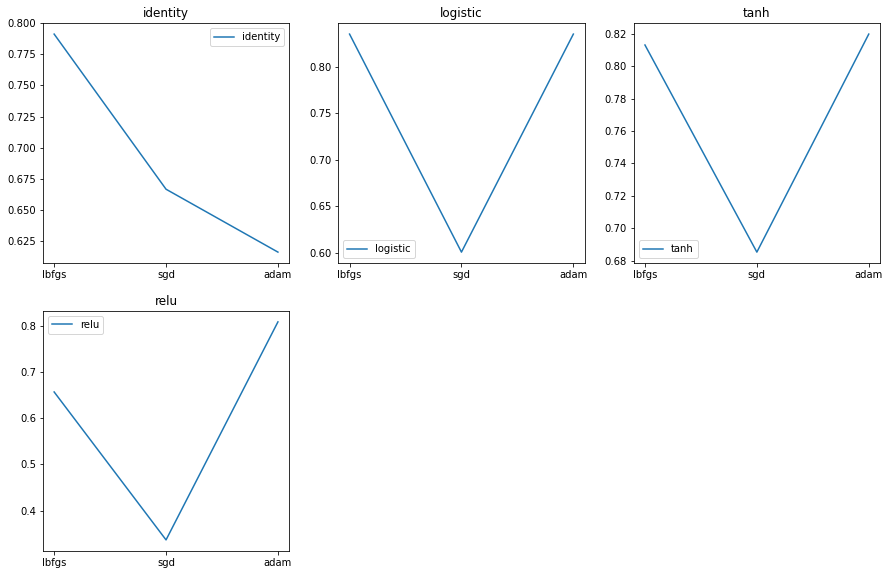

In [59]:
figure(figsize=(15,15))

i=0
functions=('identity', 'logistic', 'tanh', 'relu')
names=('lbfgs', 'sgd', 'adam')
score=[]

for function in functions:
    scores=[]
    i=i+1
    for name in names: 
        plt.subplot(3,3,i)
        clf= MLPClassifier( (4, 3, 2), max_iter=5000, activation= function, solver= name, learning_rate_init=0.01, learning_rate= 'invscaling')
        clf.fit(X_train_dataset, y_train)
        scores.append( clf.score(X_train_dataset, y_train) )
    plt.plot( names, scores, label= function)
    plt.title( function )
    plt.legend(loc='best')

In [60]:
model=MLPClassifier((4,3,2),max_iter=10000, activation= 'logistic', solver= 'adam', learning_rate_init=0.01, learning_rate= 'invscaling' )
model.fit(X_train_dataset, y_train)
score=model.score(X_train_dataset,y_train)
scores=cross_val_score(model, X_train_dataset, y_train, cv=5)

In [61]:
print("training score: ",score )
print("validation score: ",np.mean(scores))
#old score 0.73

training score:  0.835016835016835
validation score:  0.7811138014527845


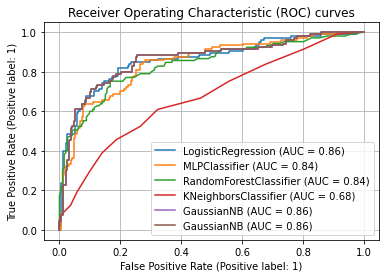

In [62]:
from sklearn import metrics
ax_roc=plt.subplot(1,1,1)
ax_roc.grid()
ax_roc.set_title("Receiver Operating Characteristic (ROC) curves")
metrics.plot_roc_curve(mode,  X_test_dataset, y_test,  sample_weight=None, drop_intermediate=True, response_method='predict_proba', name=None, ax=ax_roc, pos_label=None )
metrics.plot_roc_curve(model,  X_test_dataset, y_test,  sample_weight=None, drop_intermediate=True, response_method='predict_proba', name=None, ax=ax_roc, pos_label=None )
metrics.plot_roc_curve(model2, X_test_dataset, y_test,  sample_weight=None, drop_intermediate=True, response_method='predict_proba', name=None, ax=ax_roc, pos_label=None )
metrics.plot_roc_curve(model3, X_test_dataset, y_test,  sample_weight=None, drop_intermediate=True, response_method='predict_proba', name=None, ax=ax_roc, pos_label=None )
metrics.plot_roc_curve(model4, X_test_dataset, y_test,  sample_weight=None, drop_intermediate=True,response_method='predict_proba', name=None, ax=ax_roc, pos_label=None )
metrics.plot_roc_curve(model4, X_test_dataset, y_test,  sample_weight=None, drop_intermediate=True,response_method='predict_proba', name=None, ax=ax_roc, pos_label=None )

# Final Model: Random Forest

In [63]:
model2=RandomForestClassifier(n_estimators=nr_trees[argmax(outofsampleE)])
model2.fit(X_dataset,y)

RandomForestClassifier(n_estimators=200)

# Testing the model: application on the test dataset

Since the test dataset has many Nan, first we will fix those datapoints with the same strategy used before.

In [64]:
test_dataset=pd.read_csv('titanic/test.csv', encoding='utf8')
test_dataset.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [65]:
test_dataset.Cabin.unique()

array([nan, 'B45', 'E31', 'B57 B59 B63 B66', 'B36', 'A21', 'C78', 'D34',
       'D19', 'A9', 'D15', 'C31', 'C23 C25 C27', 'F G63', 'B61', 'C53',
       'D43', 'C130', 'C132', 'C101', 'C55 C57', 'B71', 'C46', 'C116',
       'F', 'A29', 'G6', 'C6', 'C28', 'C51', 'E46', 'C54', 'C97', 'D22',
       'B10', 'F4', 'E45', 'E52', 'D30', 'B58 B60', 'E34', 'C62 C64',
       'A11', 'B11', 'C80', 'F33', 'C85', 'D37', 'C86', 'D21', 'C89',
       'F E46', 'A34', 'D', 'B26', 'C22 C26', 'B69', 'C32', 'B78',
       'F E57', 'F2', 'A18', 'C106', 'B51 B53 B55', 'D10 D12', 'E60',
       'E50', 'E39 E41', 'B52 B54 B56', 'C39', 'B24', 'D28', 'B41', 'C7',
       'D40', 'D38', 'C105'], dtype=object)

In [97]:
cabin_T=test_dataset.Cabin
cabin_T;
nan_arr_T=[]
for i in range(cabin_T.shape[0]):
    word=str(cabin_T[i])
    if(word[0]=='A'):
        cabin_T[i]=1
    elif(word[0]=='B'):
        cabin_T[i]=2
    elif(word[0]=='C'):
        cabin_T[i]=3
    elif(word[0]=='D'):
        cabin_T[i]=4
    elif(word[0]=='E'):
        cabin_T[i]=5
    elif(word[0]=='F'):
        cabin_T[i]=6
    elif(word[0]=='G'):
        cabin_T[i]=7
    elif(word[0]=='T'):
        cabin_T[i]=8

In [67]:
array_random= []
for i in cabin_T:
    if not(isnan(i)):
        array_random.append(i)
max(array_random)

7

array([ 7., 18., 35., 13.,  9.,  8.,  1.])

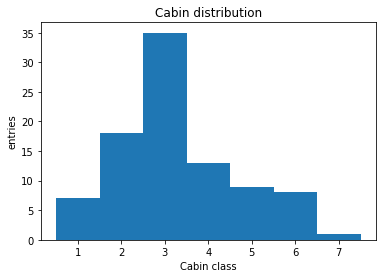

In [68]:
entries=[]
entries= plt.hist(array_random, bins=7, range=[0.5,7.5])
plt.title('Cabin distribution')
plt.xlabel("Cabin class")
plt.ylabel("entries")
Nentries=entries[0]
Nentries

In [69]:
bins=entries[1]
Nbins=bins[1:]
Nbins

array([1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5])

In [70]:
tot=sum(Nentries)
prob=[]
for i in Nentries:
    prob.append(i/tot)
prob;

In [96]:
countNan=0
for i in range(cabin_T.shape[0]):
    if(isnan(cabin_T[i])):
        cabin_T[i]=int(np.random.choice(Nbins,p=prob))
cabin_T
test_cabin=cabin_T

In [72]:
test_sex=[]
for ii in test_dataset.Sex:
    if(ii=='female'):
        test_sex.append(0)#0 if FEMALE
    else:
        test_sex.append(1)# 1 if MALE
test_embark=[]
for ii in test_dataset.Embarked:
    if(ii =='C'):
        test_embark.append(0) #0  if Cherbourg
    elif(ii =='Q'):
        test_embark.append(1) # 1 if Queenstown
    elif(ii =='S'):
        test_embark.append(2) # 2 if Southampton
    else:
        test_embark.append(np.nan)

In [73]:
test_embark=np.array(test_embark)
test_sex=np.array(test_sex)
test_Pclass=np.array(test_dataset.Pclass)
test_Age=np.array(test_dataset.Age)
test_SibSp=np.array(test_dataset.SibSp)
test_Parch=np.array(test_dataset.Parch)
test_Cabin=np.array(test_dataset.Cabin)
test_Fare=np.array(test_dataset.Fare)

In [74]:
size(test_sex)

418

In [75]:
lista2=[test_Pclass,test_sex,test_Age,test_SibSp,test_Parch,test_Fare,test_cabin,test_embark]
count=0
for i in lista2:
    for j in i:
        if( isnan(j)):
            count= count+1
    print( count)
    count=0

0
0
86
0
0
1
0
0


Text(0, 0.5, 'entries')

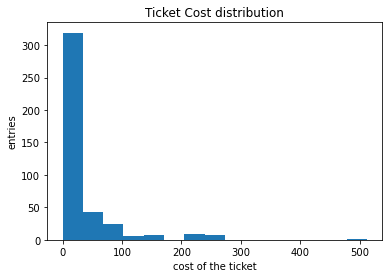

In [76]:
array_cost= test_dataset.Fare
myhistoCost=plt.hist(array_cost,bins=15)
plt.title("Ticket Cost distribution")
plt.xlabel("cost of the ticket")
plt.ylabel("entries")

In [77]:
NentriesCost=myhistoCost[0]
NbinsCost=myhistoCost[1]
NbinsCostt=NbinsCost[1:]
NbinsCostt

array([ 34.15528,  68.31056, 102.46584, 136.62112, 170.7764 , 204.93168,
       239.08696, 273.24224, 307.39752, 341.5528 , 375.70808, 409.86336,
       444.01864, 478.17392, 512.3292 ])

In [78]:
probCost=[]
totCost=sum(NentriesCost)
for i in NentriesCost:
    probCost.append(i/totCost)
size(probCost)

15

In [79]:
test_Fare2=np.array(test_dataset.Fare)
for i in range(test_Fare2.shape[0]):
    if(isnan(test_Fare2[i])):
        test_Fare2[i]=np.random.choice(NbinsCostt,p=probCost)
test_Fare2;

Text(0, 0.5, 'entries')

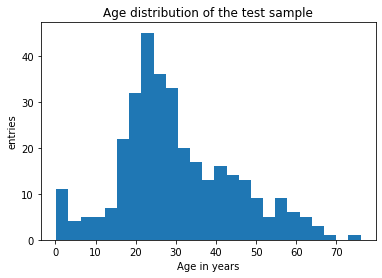

In [80]:
test_Age
test_Agesplit=[]
for i in test_Age:
    if(isfinite(i)):
        test_Agesplit.append(i)
test_Agesplit;
myhisto=plt.hist(test_Agesplit, bins=25)
plt.title("Age distribution of the test sample")
plt.xlabel("Age in years")
plt.ylabel("entries")

In [81]:
NentriesAge=myhisto[0]
binsAge=myhisto[1]
myhisto

(array([11.,  4.,  5.,  5.,  7., 22., 32., 45., 36., 33., 20., 17., 13.,
        16., 14., 13.,  9.,  5.,  9.,  6.,  5.,  3.,  1.,  0.,  1.]),
 array([ 0.17  ,  3.2032,  6.2364,  9.2696, 12.3028, 15.336 , 18.3692,
        21.4024, 24.4356, 27.4688, 30.502 , 33.5352, 36.5684, 39.6016,
        42.6348, 45.668 , 48.7012, 51.7344, 54.7676, 57.8008, 60.834 ,
        63.8672, 66.9004, 69.9336, 72.9668, 76.    ]),
 <BarContainer object of 25 artists>)

In [82]:
probAge=[]
totAge=sum(NentriesAge)
for i in NentriesAge:
    probAge.append(i/totAge)
size(probAge);

In [83]:
binsAgetest=binsAge[1:]
binsAgetest

array([ 3.2032,  6.2364,  9.2696, 12.3028, 15.336 , 18.3692, 21.4024,
       24.4356, 27.4688, 30.502 , 33.5352, 36.5684, 39.6016, 42.6348,
       45.668 , 48.7012, 51.7344, 54.7676, 57.8008, 60.834 , 63.8672,
       66.9004, 69.9336, 72.9668, 76.    ])

In [84]:
test_Age2=np.array(test_dataset.Age)
for i in range(test_Age2.shape[0]):
    if(isnan(test_Age2[i])):
        test_Age2[i]=np.random.choice(binsAgetest,p=probAge)
test_Age2;

In [85]:
lista2=[test_Pclass,test_sex,test_Age2,test_SibSp,test_Parch,test_Fare2,test_cabin,test_embark]
count=0
for i in lista2:
    for j in i:
        if( isnan(j)):
            count= count+1
    print( count)
    count=0

0
0
0
0
0
0
0
0


In [86]:
X_test=np.vstack((test_Pclass,test_sex,test_Age2,test_SibSp,test_Parch,test_Fare2,test_cabin,test_embark))

In [87]:
X_test=X_test.T
X_test

array([[3, 1, 34.5, ..., 7.8292, 2, 1],
       [3, 0, 47.0, ..., 7.0, 4, 2],
       [2, 1, 62.0, ..., 9.6875, 3, 1],
       ...,
       [3, 1, 38.5, ..., 7.25, 6, 2],
       [3, 1, 18.3692, ..., 8.05, 1, 2],
       [3, 1, 36.5684, ..., 22.3583, 3, 0]], dtype=object)

## The Test dataset is ready!

In [88]:
model2.predict(X_test)

array([0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [89]:
# Step 1 Importing pandas

# Step 2 Prepare your data
data = {'PassengerId': test_dataset.PassengerId, 
        'Survived': model2.predict(X_test)}

# Step 3 Create a DataFrame using DataFrame function
df = pd.DataFrame(data)
df
y_test=df.Survived

In [90]:
# Step 4 Specify the file path to save data
csv_file_path = 'myTitanicSolution.csv'
# Step 5 Write the DataFrame to a CSV file using to_csv() function where file path is passed
df.to_csv(csv_file_path, index=False)

print(f'CSV file "{csv_file_path}" has been created successfully.')

CSV file "myTitanicSolution.csv" has been created successfully.


In [91]:
truth_dataset=pd.read_csv('titanic/truth.csv', encoding='utf8')
truth_dataset.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


# Check for the results and performance!
In order to evaluate the performance of the model I am estimating the accuracy.

In [92]:
from sklearn.metrics import accuracy_score

In [93]:
y_truth=truth_dataset.Survived

In [95]:
print("Accuracy score: ", accuracy_score(y_truth, y_test))

Accuracy score:  0.854066985645933
